# NTRODUCCIÓN A LA VISUALIZACIÓN EN PYTHON


### Objetivo

- Aprender a graficar datos en Python.
- Entender el uso básico de las librerías más utilizadas: Matplotlib y Seaborn.


### ¿Por qué Matplotlib?
- Es la librería de visualización más utilizada en el entorno de Python.
- Es sencilla y fácil de usar.
- Permite un alto nivel de personalización de los gráficos.
- Es open source.
- Es la base sobre la que se construyen otras librerías como Seaborn.


### Interfaces de Matplotlib
- Definen la forma en la que interactuamos con el gráfico. 
- Proveen compatibilidad con el lenguaje que inspiró la librería: MATLAB
- Existen dos interfaces disponibles:
    - Interfaz orientada a estados, orientada a usuarios de MATLAB para mantener compatibilidad.
    - Interfaz orientada a objetos: Permite mayor grado de control sobre los gráficos porque los tratamos como objetos. 

Más Pythonista para nuestro gusto (y la más utilizada)
Del lado Python de la vida! 🐍💪

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt #conda install -c conda-forge matplotlib
import seaborn as sns #conda install -c anaconda seaborn
import pandas as pd #conda install -c anaconda pandas 

In [59]:
#Estilos existentes:
#https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html
mpl.style.use('bmh')

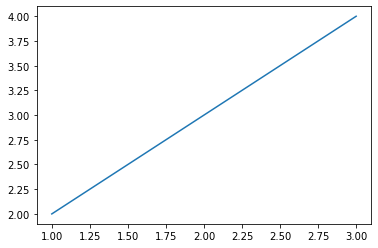

In [36]:
#plt.subplots() Regresa una tupla
#1) Probar plt.subplots (nrows, ncols)

fig, ax = plt.subplots() # inicializa la grafica
ax.plot([1, 3], [2, 4])  # Primera parte el eje horizontal (eje x), la segunda vertical (eje y)

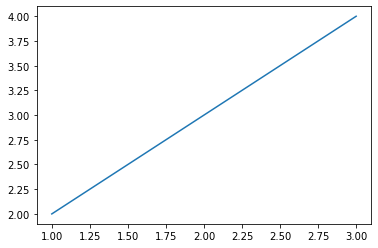

In [37]:
#Hace exactamente lo mismo (orientado a estados)
plt.plot([1, 3], [2, 4])

In [41]:
df_lluvias = pd.read_csv(r'~\Downloads\archive/pune_1965_to_2002.csv')
df_lluvias.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [42]:
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


#### Graficaremos precipitaciones acumuladas de distintos años

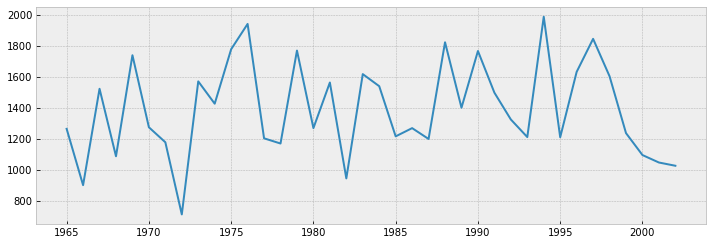

In [65]:
# 1)Obtendremos del eje x por medio del indice.
# 2)Obtendremos del eje y, la suma por año (axis = 1)

x = df_lluvias.index
y = df_lluvias.sum(axis=1)
fig, ax = plt.subplots(figsize=(12, 4)) #figsize=(width, height) por pulgadas
# https://pixelsconverter.com/pixels-to-inches 
# https://www.unitconverters.net/typography/pixel-x-to-centimeter.htm
ax.plot(x, y, label='Precipitaciones acumuladas')

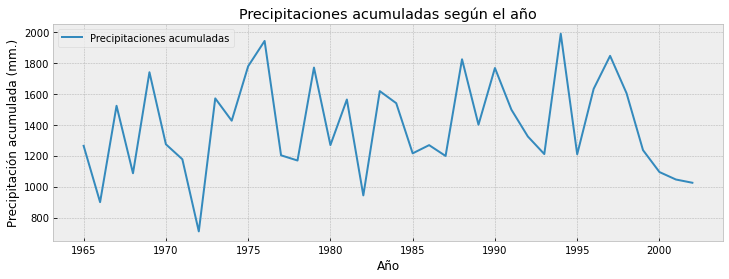

In [67]:
ax.set_xlabel('Año')  
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año') 
ax.legend()
#ax.legend(loc='upper right')
fig # Para que aparezca de nuevo la grafica

1965
1972


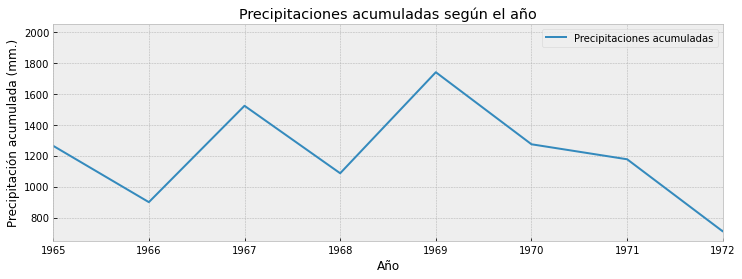

In [88]:
print(df_lluvias.index[0])
print(df_lluvias.index[7])
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[7])
fig
#fig.savefig("precipitaciones_año.pdf") #Exportamos el grafico en un archivo pdf

In [ ]:
#1) 

### Tipos de Graficos

#### Gráficos de líneas

- Son adecuados para visualizar datos con secuencialidad temporal, como las series de tiempo.
- Se grafican con el método  ax.plot(x, y)
- En caso de no especificarse x, matplotlib toma como coordenadas en x al arreglo de números enteros [0, 1, 2, …, n]

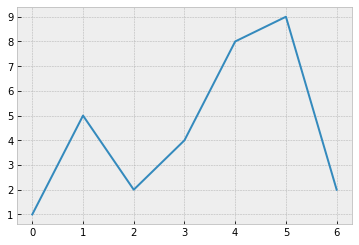

In [91]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3, 4, 5, 6], [1, 5, 2, 4, 8, 9, 2])

#### Gráficos de puntos o dispersión

- Útiles cuando se tienen una **gran cantidad de datos numéricos emparejados**
- Permiten visualizar la relación entre las variables por medio de la **nube de puntos**
    - Nube de puntos “alineada”         --> relación fuerte
    - Nube de puntos “dispersa”          --> relación débil o nula
-Se grafican con ax.scatter

In [92]:
pesos = [42.8, 43.3, 42. , 44. , 44.1, 43.5, 48.1, 48.9, 47.7,46.9,50.4,
       52.7, 51.8, 54.5, 54.2, 56.9, 55.4, 55.5, 57.1, 58.3, 63.7, 58.8,
       64.6, 60.2, 64. , 63.8, 61.4, 66.3, 64.7, 63.9, 69.3, 67.9, 65.2,
       70.8, 70.5, 69.3, 75.3, 75.5, 78.2, 78. , 73.2, 78. , 80.1, 78.2,
       76. , 81.5, 79.4, 81.8, 81.8, 84.1]
alturas = [149. , 149. , 149.9, 156.8, 150.6, 155.4, 151. , 162. , 165.,
       157.8, 164.4, 160.1, 160.8, 163.8, 175.2, 162. , 159.5, 159.2,
       169.8, 166.7, 179.4, 180.6, 163.3, 178.8, 176.3, 184.8, 181. ,
       170.5, 184.1, 187.1, 187.1, 177.7, 184.5, 190.3, 196. , 192.1,
       200.4, 201.8, 187.5, 202.1, 200.3, 208.8, 204.6, 193.5, 200.9,
       196.8, 213.1, 204.8, 215.5, 210.2] 

Text(0, 0.5, 'Peso (kg.)')

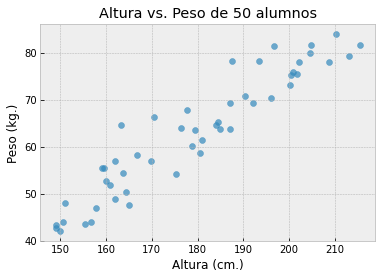

In [93]:
fig, ax = plt.subplots()
ax.scatter(alturas, pesos, alpha=0.7) # Codigo para crear un grafico de puntos
ax.set_title('Altura vs. Peso de 50 alumnos')
ax.set_xlabel('Altura (cm.)')
ax.set_ylabel('Peso (kg.)')

C:\Users\mi13966\AppData\Local\Temp\1\ipykernel_45972\640953147.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(mapeo_colores)


Text(0, 0.5, 'Precipitaciones en Septiembre (mm.)')

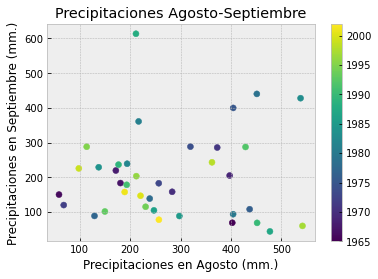

In [117]:
# Vamos a crear una grafica de puntos para ver la relación de la presipitación de Ago y Sep
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
# s = asigna el tamaño de los puntos
# s = podemos asignarle una lista de tamaño N
fig.colorbar(mapeo_colores)
ax.set_title('Precipitaciones Agosto-Septiembre')
ax.set_xlabel('Precipitaciones en Agosto (mm.)')
ax.set_ylabel('Precipitaciones en Septiembre (mm.)')

#### Gráficos de barras

- Permiten comparar y poner en perspectiva los valores de distintas variables categóricas. Por ejemplo, las precipitaciones según el mes del año. 
- Para el ejemplo, acumulemos las precipitaciones para los distintos meses a lo largo de los años.


Text(0.5, 0, 'Mes')

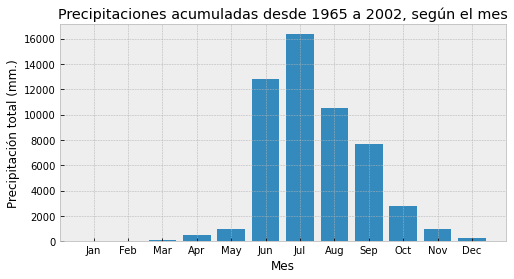

In [118]:
fig, ax = plt.subplots(figsize=(8,4))
precipitaciones_acumuladas = df_lluvias.sum()
ax.bar(df_lluvias.columns, precipitaciones_acumuladas)
ax.set_title('Precipitaciones acumuladas desde 1965 a 2002, según el mes')
ax.set_ylabel('Precipitación total (mm.)')
ax.set_xlabel('Mes')

#### Histograma

- La altura de cada barra representa la proporción o cantidad de los distintos valores de una variable numérica.
- Requiere clasificar a los datos en intervalos de clase.
- Permiten comparar la frecuencia relativa o absoluta de cada intervalo.
- Se construyen con ax.hist, que recibe como parámetro:
    - El arreglo de valores. 
    - bins, que representa la cantidad de intervalos a construir.

Text(0, 0.5, 'Frecuencia absoluta')

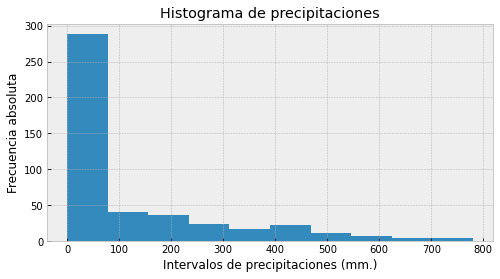

In [145]:
fig, ax = plt.subplots(figsize=(8, 4))
# https://www.geeksforgeeks.org/numpy-ndarray-flatten-function-python/
ax.hist(df_lluvias.values.flatten(), bins=10)
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

### Enriqueciendo las visualizaciones

#### Múltiples elementos

- En ocasiones necesitamos resaltar ciertas características de los datos. 
- Por ejemplo, ¿Qué pasa si quisiéramos resaltar el punto máximo en una serie de tiempo?
- Podemos cargar al objeto ax con múltiples elementos para que los muestre todos juntos?

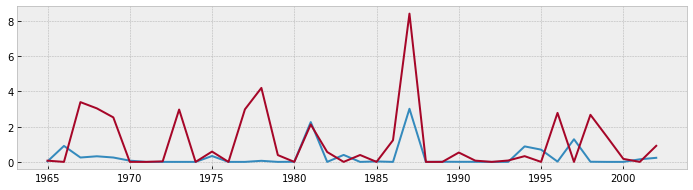

In [155]:
# Comparemos las precipitaciones de Enero y Febrero en el mismo objeto ax

fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')

In [158]:
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()
ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')

In [162]:
ax.set_xlabel('Año')  
ax.set_ylabel('Precipitación (mm.)') 
ax.set_title('Precipitaciones de enero y febrero')
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend()

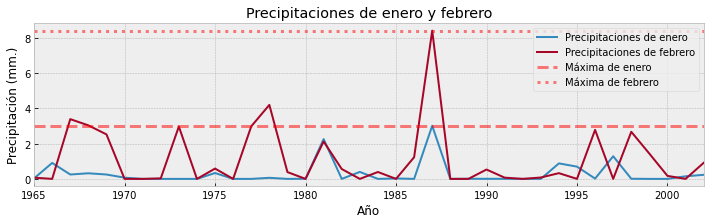

In [161]:
fig